In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
DATA_PATH = '../dataset/electricity_cost_dataset.csv'

df = pd.read_csv(DATA_PATH)

In [56]:
# Now I will proceed with each structure type seperately
df = df.drop(['recycling rate', 'air qality index', 'issue reolution time'], axis=1)

res_df = df[df['structure type'] == 'Residential']
com_df = df[df['structure type'] == 'Commercial']
ind_df = df[df['structure type'] == 'Industrial']
mix_df = df[df['structure type'] == 'Mixed-use']

res_df = res_df.drop(['structure type'], axis=1)
com_df = com_df.drop(['structure type', 'resident count'], axis=1)
ind_df = ind_df.drop(['structure type', 'resident count'], axis=1)
mix_df = mix_df.drop(['structure type'], axis=1)

In [57]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3939 entries, 3 to 9996
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site area          3939 non-null   int64  
 1   water consumption  3939 non-null   float64
 2   utilisation rate   3939 non-null   int64  
 3   resident count     3939 non-null   int64  
 4   electricity cost   3939 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 184.6 KB


In [68]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
        self.X = None
        self.Y = None

    def set_data(self, x, y):
        self.X = x
        self.Y = y

    def fit(self, X=None, y=None, verbose=True):
        if X is None: X = self.X
        if y is None: y = self.Y
        if self.X is None and self.Y is None:
            raise ValueError('No data provided to fit. Use set_data() or pass X and y in the function')
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)

        # 1. Initializing parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = 0.0

        # 2. Gradient Descent
        for i in range(self.n_iterations):
            # Calculate predictions
            y_pred = X @ self.weights + self.bias

            # Calculating cost (MSE)
            cost = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)
            self.cost_history.append(cost)

            # Calculating the gradients
            dw = (1 / n_samples) * (X.T @ (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Updating parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Printing cost periodically
            if(verbose):
                if (i+1) % (self.n_iterations // 10) == 0 or i == 0: 
                    print(f"Iteration {i+1}/{self.n_iterations}, Cost: {cost:.4f}")

        print(f'Completed {self.n_iterations} iterations. Final Cost: {self.cost_history[-1]:.4f}')
        plt.figure(figsize=(8, 6))
        plt.plot(range(len(self.cost_history)), self.cost_history)
        plt.xlabel("Iteration")
        plt.ylabel("Cost (MSE)")
        plt.title("Gradient Descent Cost History")
        plt.grid(True)
        plt.show()

    def predict(self, X):
        return X @ self.weights + self.bias
    
    def mse_score(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)
    
    def r2_score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred)**2)
        ss_tot = np.sum((y_true - np.mean(y_true))**2)
        if ss_tot == 0:
            return 1.0 if ss_res == 0 else 0.0
        return 1 - (ss_res / ss_tot)
    
    def evaluate(self, x=None, y=None):
        if x is None: x = self.X
        if y is None: y = self.Y
        y_pred = self.predict(x)

        mse = self.mse_score(y, y_pred)
        r2 = self.r2_score(y, y_pred)

        return y_pred, mse, r2


In [66]:
def normalize(X_raw: pd.DataFrame, X_test: pd.DataFrame, Y_Train: np.ndarray, Y_Test: np.ndarray):
    x_min = X_raw.min()
    x_max = X_raw.max()

    X_train_scaled = (X_raw - x_min) / (x_max - x_min)
    X_test_scaled = (X_test - x_min) / (x_max - x_min)

    y_min = Y_Train.min()
    y_max = Y_Train.max()

    Y_train_scaled = (Y_Train - y_min) / (y_max - y_min)
    Y_test_scaled = (Y_Test - y_min) / (y_max - y_min)

    return X_train_scaled.values, X_test_scaled.values, Y_train_scaled, Y_test_scaled

def custom_test_train(df: pd.DataFrame, target_col: str, train_size: float = 0.8, random_state: int = 42):
    shuffled_df = df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    split_index = int(len(df) * train_size)
    df_train = shuffled_df[:split_index]
    df_test = shuffled_df[split_index:]

    X_train = df_train.drop(target_col, axis=1)
    Y_train = df_train[target_col].values.reshape(-1, 1)
    X_test = df_test.drop(target_col, axis=1)
    Y_test = df_test[target_col].values.reshape(-1, 1)

    return normalize(X_train, X_test, Y_train, Y_test)

Iteration 1/10000, Cost: 0.1082
Iteration 1000/10000, Cost: 0.0020
Iteration 2000/10000, Cost: 0.0010
Iteration 3000/10000, Cost: 0.0008
Iteration 4000/10000, Cost: 0.0007
Iteration 5000/10000, Cost: 0.0007
Iteration 6000/10000, Cost: 0.0006
Iteration 7000/10000, Cost: 0.0006
Iteration 8000/10000, Cost: 0.0006
Iteration 9000/10000, Cost: 0.0006
Iteration 10000/10000, Cost: 0.0006
Completed 10000 iterations. Final Cost: 0.0006


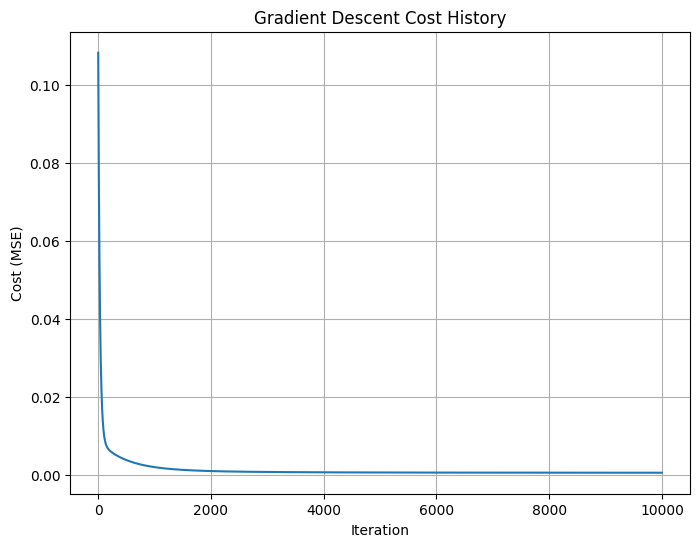


-------- Model Evaluation ----------
Optimal weight (GD): [0.3668405  0.10506751 0.11716104 0.39321246]
Optimal Bias (GD): 0.0412
Gradient Descent - MSE: 0.0013, R2: 0.9659117515471627


In [75]:
x_train, x_test, y_train, y_test = custom_test_train(res_df, 'electricity cost')

res_gd = LinearRegressionGD(n_iterations=10000)
res_gd.set_data(x_train, y_train)
res_gd.fit()
res_pred, res_mse, res_r2 = res_gd.evaluate(x_test, y_test)


print('\n-------- Model Evaluation ----------')
print(f"Optimal weight (GD): {res_gd.weights[:,0]}")
print(f"Optimal Bias (GD): {res_gd.bias:.4f}")
print(f"Gradient Descent - MSE: {res_mse:.4f}, R2: {res_r2}")


Iteration 1/10000, Cost: 0.1458
Iteration 1000/10000, Cost: 0.0032
Iteration 2000/10000, Cost: 0.0017
Iteration 3000/10000, Cost: 0.0013
Iteration 4000/10000, Cost: 0.0012
Iteration 5000/10000, Cost: 0.0012
Iteration 6000/10000, Cost: 0.0011
Iteration 7000/10000, Cost: 0.0011
Iteration 8000/10000, Cost: 0.0011
Iteration 9000/10000, Cost: 0.0010
Iteration 10000/10000, Cost: 0.0010
Completed 10000 iterations. Final Cost: 0.0010


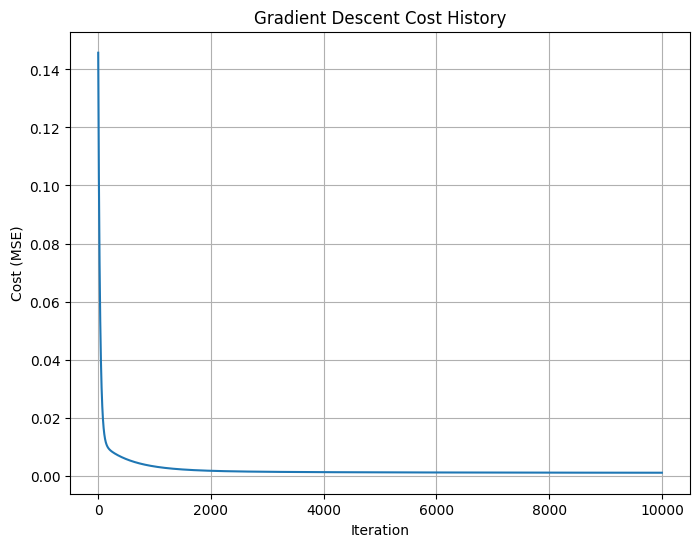


-------- Model Evaluation ----------
Optimal weight (GD): [0.63670809 0.15226421 0.14248234]
Optimal Bias (GD): 0.0651
Gradient Descent - MSE: 0.0019, R2: 0.9592473861469957


In [76]:
x_train, x_test, y_train, y_test = custom_test_train(com_df, 'electricity cost')

res_gd = LinearRegressionGD(n_iterations=10000)
res_gd.set_data(x_train, y_train)
res_gd.fit()
res_pred, res_mse, res_r2 = res_gd.evaluate(x_test, y_test)


print('\n-------- Model Evaluation ----------')
print(f"Optimal weight (GD): {res_gd.weights[:,0]}")
print(f"Optimal Bias (GD): {res_gd.bias:.4f}")
print(f"Gradient Descent - MSE: {res_mse:.4f}, R2: {res_r2}")

Iteration 1/10000, Cost: 0.1450
Iteration 1000/10000, Cost: 0.0039
Iteration 2000/10000, Cost: 0.0018
Iteration 3000/10000, Cost: 0.0013
Iteration 4000/10000, Cost: 0.0011
Iteration 5000/10000, Cost: 0.0010
Iteration 6000/10000, Cost: 0.0010
Iteration 7000/10000, Cost: 0.0010
Iteration 8000/10000, Cost: 0.0009
Iteration 9000/10000, Cost: 0.0009
Iteration 10000/10000, Cost: 0.0009
Completed 10000 iterations. Final Cost: 0.0009


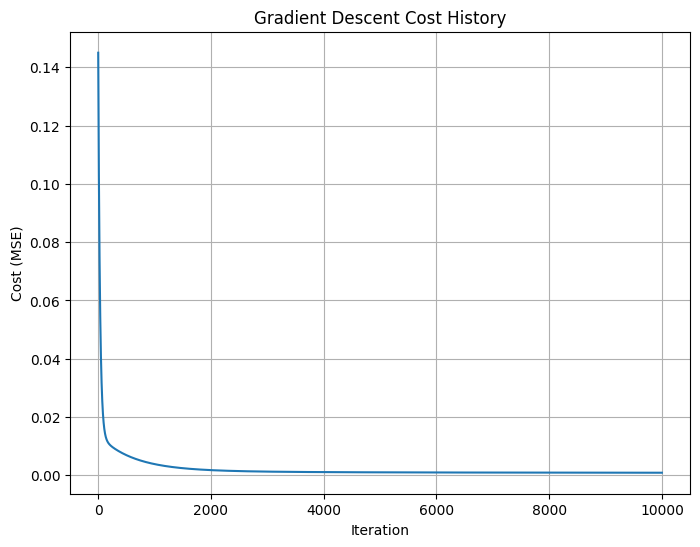


-------- Model Evaluation ----------
Optimal weight (GD): [0.6749014  0.17093428 0.21190733]
Optimal Bias (GD): 0.0024
Gradient Descent - MSE: 0.0024, R2: 0.9582254966456265


In [77]:
x_train, x_test, y_train, y_test = custom_test_train(ind_df, 'electricity cost')

res_gd = LinearRegressionGD(n_iterations=10000)
res_gd.set_data(x_train, y_train)
res_gd.fit()
res_pred, res_mse, res_r2 = res_gd.evaluate(x_test, y_test)


print('\n-------- Model Evaluation ----------')
print(f"Optimal weight (GD): {res_gd.weights[:,0]}")
print(f"Optimal Bias (GD): {res_gd.bias:.4f}")
print(f"Gradient Descent - MSE: {res_mse:.4f}, R2: {res_r2}")

Iteration 1/10000, Cost: 0.1567
Iteration 1000/10000, Cost: 0.0037
Iteration 2000/10000, Cost: 0.0025
Iteration 3000/10000, Cost: 0.0022
Iteration 4000/10000, Cost: 0.0020
Iteration 5000/10000, Cost: 0.0019
Iteration 6000/10000, Cost: 0.0018
Iteration 7000/10000, Cost: 0.0018
Iteration 8000/10000, Cost: 0.0018
Iteration 9000/10000, Cost: 0.0017
Iteration 10000/10000, Cost: 0.0017
Completed 10000 iterations. Final Cost: 0.0017


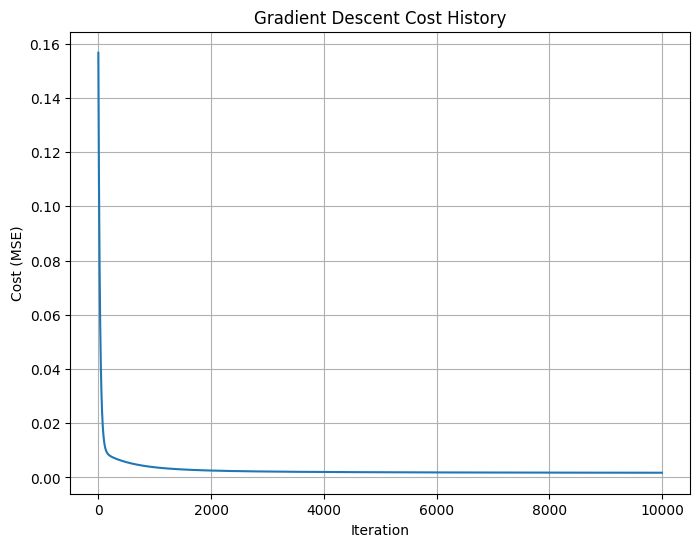


-------- Model Evaluation ----------
Optimal weight (GD): [0.59730955 0.16974577 0.20007427 0.02629473]
Optimal Bias (GD): 0.0514
Gradient Descent - MSE: 0.0032, R2: 0.9328461226115534


In [78]:
x_train, x_test, y_train, y_test = custom_test_train(mix_df, 'electricity cost')

res_gd = LinearRegressionGD(n_iterations=10000)
res_gd.set_data(x_train, y_train)
res_gd.fit()
res_pred, res_mse, res_r2 = res_gd.evaluate(x_test, y_test)


print('\n-------- Model Evaluation ----------')
print(f"Optimal weight (GD): {res_gd.weights[:,0]}")
print(f"Optimal Bias (GD): {res_gd.bias:.4f}")
print(f"Gradient Descent - MSE: {res_mse:.4f}, R2: {res_r2}")